In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
def add_noise(X, mean=0, stddev=0.5):
    e = np.random.normal(mean, stddev, len(X))
    X = X + e
    return X

In [3]:
def k_se_new(xp,xq,l,sigma2):
    if xp.shape != xq.shape:
        print("Tiling matrices to make sizes match!")
        xp_rep = np.tile(xp,(len(xq),1))
        xp_rep = xp_rep.T
        print(xp_rep.shape)
        xq_rep = np.tile(xq,(len(xp),1))
        print(xq_rep.shape)
    else:
        xp_rep = xp
        xq_rep = xq
    X = np.vstack((xp_rep,xq_rep))
    X = X.T
    K = np.zeros((X.shape[0],X.shape[0]))
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[0]):
            K[i,j] = sigma2*np.exp(-1.0/(2.0*l*l)*(X[i,:]-X[j,:]).dot((X[i,:]-X[j,:]).T))
    return K

def k_se(X,l,sigma2):
    X = np.vstack((X,X))
    X = X.T
    K = np.zeros((X.shape[0],X.shape[0]))
    for i in range(0,X.shape[0]):
        for j in range(0,X.shape[0]):
            K[i,j] = sigma2*np.exp(-1.0/(2.0*l*l)*(X[i,:]-X[j,:]).dot((X[i,:]-X[j,:]).T))
    return K

def k_se2(xp,xq,l,sigma2):
    if xp.shape != xq.shape:
        print("Tiling matrices to make sizes match!")
        xp_rep = np.tile(xp,(len(xq),1))
        xp_rep = xp_rep.T
        print(xp_rep.shape)
        xq_rep = np.tile(xq,(len(xp),1))
        print(xq_rep.shape)
    else:
        xp_rep = xp
        xq_rep = xq
    diff = np.square((xp_rep - xq_rep))
#     K = sigma*sigma*exp((-1/(l*l))*diff)'
    K = sigma2*np.exp(0.5*(l*l))*diff
    return K

def sinusoidal_model(cardinality=7):
    x = np.linspace(-1*np.pi,np.pi,cardinality)
    return np.sin(x)

/home/jonas/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: RuntimeWarning: covariance is not positive-semidefinite.
/home/jonas/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: covariance is not positive-semidefinite.


(629, 629)


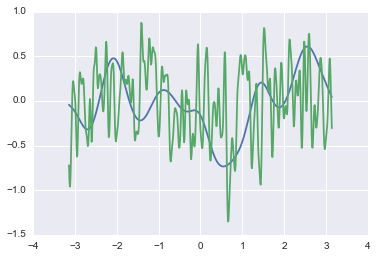

In [4]:


l = 0.5
sigma2 = 0.2
X = np.arange(-1*np.pi, np.pi, 0.01)
# X = np.vstack((X,X))
# X = X.T

covariance = k_se(X,l,sigma2)
mean = np.zeros(len(X))
print(covariance.shape)
sample_function1 = np.random.multivariate_normal(mean,covariance,1)

l = 0.05
covariance = k_se(X,l,sigma2)
sample_function2 = np.random.multivariate_normal(mean,covariance,1)

X = np.arange(-3.14159, 3.14159, 0.01)


sns.plt.plot(X,sample_function1.T)
sns.plt.plot(X,sample_function2.T)
sns.plt.show()

In [5]:
y = sinusoidal_model()
y_disturbed = add_noise(y)

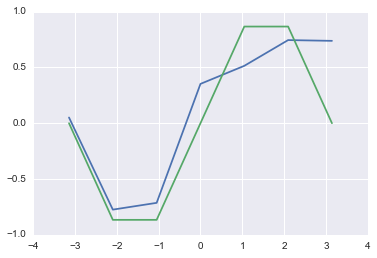

In [6]:
X = np.linspace(-1*np.pi,np.pi,7)
sns.plt.plot(X,y_disturbed)
sns.plt.plot(X,y)


In [7]:
   
xq = np.arange(-1*np.pi, np.pi, 0.01)
xp = np.linspace(-1*np.pi,np.pi,7)

xq_rep = np.tile(xq,(len(xp),1))
xp_rep = np.tile(xp,(len(xq),1))
xp_rep = xp_rep.T
print("xp dimensions: " + str(xp.shape))
print("xq dimensions: " + str(xq.shape))
# X = np.vstack((xp_rep,xq_rep))
# X = X.T
mix = k_se2(xp,xq,l,sigma2)
print(mix.shape)

K = k_se2(xp,xp,l,sigma2) #K(X,X), should be NxN
print("K dimensions: " + str(K.shape))

Kstar = k_se2(xp,xq,l,sigma2) #K*(X,X*) should be NxN*
print("K* dimensions: " + str(Kstar.shape))

predict = k_se2(xq,xq,l,sigma2)
print(predict.shape)
mix_inv = np.dot(mix.T,np.linalg.inv(known))
mean = np.dot(mix_inv,y)
covariance = predict - np.dot(np.dot(mix,np.linalg.inv(known)),mix)
# X = np.vstack((xp_rep,xq_rep))
# X = X.T
# known = k_se(X,)

xp dimensions: (7,)
xq dimensions: (629,)
Tiling matrices to make sizes match!
(7, 629)
(7, 629)
(7, 629)
K dimensions: (7,)
Tiling matrices to make sizes match!
(7, 629)
(7, 629)
K* dimensions: (7, 629)
(629,)


NameError: name 'known' is not defined

In [ ]:
def kern_se(x1,x2,l,sigma2):
    r = np.square(np.linalg.norm(x1-x2))
    print(r)
    gamma = (1/(2*l*l))
    return sigma2*np.exp(-1*(gamma*r))
    
xq = np.arange(-1*np.pi, np.pi, 0.01)
xp = np.linspace(-1*np.pi,np.pi,7)
l = 0.1
sigma2 = 0.3
xq_rep = np.tile(xq,(len(xp),1))
xp_rep = np.tile(xp,(len(xq),1))
xq_rep = xq_rep.T
K = kern_se(xp_rep,xq_rep,l,sigma2)
print(K)

In [16]:
A = np.random.normal(0,1,(10,2))
print(A)
A = A.flatten()
print(A)
A = A.reshape((10,2))
print(A)


[[ 0.54633765 -0.02026875]
 [ 0.01760753  0.74578926]
 [-1.52685841  1.90291792]
 [ 0.97426803 -0.90140079]
 [ 0.08331122 -0.60716476]
 [ 1.1282756   1.7848619 ]
 [-0.40155507  1.68142895]
 [-1.46013159  1.96709236]
 [ 0.19249059  1.49028954]
 [ 1.80288403  0.32436868]]
[ 0.54633765 -0.02026875  0.01760753  0.74578926 -1.52685841  1.90291792
  0.97426803 -0.90140079  0.08331122 -0.60716476  1.1282756   1.7848619
 -0.40155507  1.68142895 -1.46013159  1.96709236  0.19249059  1.49028954
  1.80288403  0.32436868]
[[ 0.54633765 -0.02026875]
 [ 0.01760753  0.74578926]
 [-1.52685841  1.90291792]
 [ 0.97426803 -0.90140079]
 [ 0.08331122 -0.60716476]
 [ 1.1282756   1.7848619 ]
 [-0.40155507  1.68142895]
 [-1.46013159  1.96709236]
 [ 0.19249059  1.49028954]
 [ 1.80288403  0.32436868]]
